## Assignment 1 

This assignment is based on the video discussed in module 1.

John Rauser ( 2014). Statistics Without the Agonizing Pain. Strata Hadoop 2014. Retrieved from https://www.youtube.com/watch?v=5Dnw46eC-0o

(Source: https://www.youtube.com/watch?v=5Dnw46eC-0o )




 
  
 

## Learning outcomes

- Use code to work with data
- Calculate basic statistical measures 
- Implement a data simulation by using resampling 


**Question 1**

1. Using the dataset from the video ( _mosquitos_data.csv_) in the folder, write Python code to:

    - Create side-by-side boxplots for the number of mosquitos in each group ( _beer vs water) 
    - What does the graph reveal about the data for both groups?  Is there an association between beer       consumption and attractiveness to mosquitos.
    - Calculate basic statistics measures for each group: Mean, median, standard deviation and explain the numbers.

2. Write code to implement the data simulation demonstrated in the above mentioned video.  Calculate the probability of obtaining the experiment outcome assuming no association between beer consumption.

## Hints

- Use pandas, matplotlib, or seaborn to plot boxplots in Python. 
- Label the graphs wherever applicable e.g, title, legend, units etc.





In [68]:
# Student Name: Jing Wang
# Uwaterloo Email: wjing@uwaterloo
# Assignment 1 - Statistics Data Science
#All interpretation are shown in comment or Markdown cell

In [69]:
#Your Work here
# Q1
import pandas as pd
# import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
# import seaborn
import seaborn as sns
%matplotlib inline
m_data=pd.read_csv('mosquitos_data.csv')
m_data=pd.DataFrame(m_data)
#Take a quick look at the data
m_data.head()

,Response,Treatment
0,27,Beer
1,20,Beer
2,21,Beer
3,26,Beer
4,27,Beer


In [70]:
#Understand data
m_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 2 columns):
Response     43 non-null int64
Treatment    43 non-null object
dtypes: int64(1), object(1)
memory usage: 816.0+ bytes


In [71]:
#Understand data
m_data.describe()

,Response
count,43.000000
mean,21.767442
std,4.471269
min,12.000000
25%,19.000000
50%,21.000000
75%,24.000000
max,31.000000


In [72]:
m_data.shape

(43, 2)

Text(0.5, 1.0, 'Boxplot - number of mosquitoes of Beer and Water Consumption')

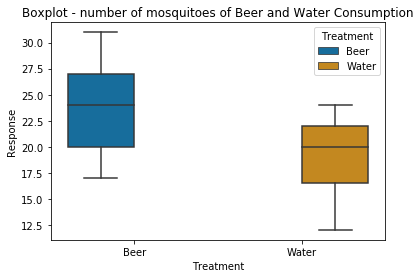

In [73]:
#Plot boxplot for the data, by show # of mosquitoes in each group
sns.boxplot(y='Response', x='Treatment', 
                 data=m_data, 
                 palette="colorblind",
                 hue='Treatment'
           ).set_title("Boxplot - number of mosquitoes of Beer and Water Consumption")

Comments: Look at two box plots, median of Beer treatment(24.5) is higher than Water treatment(20),Beer consumption group is more attractive to mosquitoes. Beer data is more variable by look at the boxplot range(17.5-32),Water Treatment data is a little bit upper skew, more data concentrate above 20,is close to the median.

In [74]:
#Q2: Compute the content of the video, resampling data by n-fold. see what you conclude. by using t-test

In [75]:
mdata_statistics=m_data.groupby('Treatment',as_index=False).agg(['mean','median','std'])
mdata_statistics

Response                 
                mean median       std
Treatment                            
Beer       23.600000     24  4.133199
Water      19.222222     20  3.671120

In [76]:
#Drop Response level
mdata_statistics.columns = mdata_statistics.columns.droplevel()
mdata_statistics

,mean,median,std
Treatment,,,
Beer,23.600000,24,4.133199
Water,19.222222,20,3.671120


In [77]:
#Beer statistics data store in Beer_Stat
Beer_Stat=mdata_statistics.iloc[0]

#Water statistics data store in Water_Stat
Water_Stat=mdata_statistics.iloc[1]

#Difference between mean of beer and mean of water
Diff_Mean=Beer_Stat['mean']-Water_Stat['mean']

In [78]:
#Get the output of Beer_Stat statistics data
Beer_Stat

mean      23.600000
median    24.000000
std        4.133199
Name: Beer, dtype: float64

In [79]:
#Get the output of Water_Stat statistics data
Water_Stat

mean      19.222222
median    20.000000
std        3.671120
Name: Water, dtype: float64

In [80]:
#Get the output of Difference in mean 
Diff_Mean

4.37777777777778

In [81]:
#Reshuffle m_data, come up with one list
import numpy as np
alldata =m_data ['Response']
alldata.head()

0    27
1    20
2    21
3    26
4    27
Name: Response, dtype: int64

<Figure size 2160x1440 with 0 Axes>

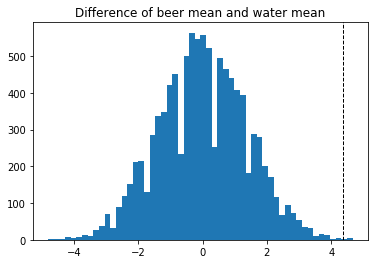

<Figure size 2160x1440 with 0 Axes>

In [82]:
diffd=[]
beer_len=len(m_data.query("Treatment=='Beer'"))
for i in range(1,10001):
        d = np.random.permutation(alldata)
        diff = float(np.mean(d[:beer_len])) - float(np.mean(d[beer_len:]))
        diffd.append(diff)
        

plt.hist(diffd,bins='auto')
plt.title('Difference of beer mean and water mean')
#Plot the line of the Mean difference we got earlier
plt.axvline(x=Diff_Mean, color='k', linestyle='dashed', linewidth=1)
plt.figure(figsize=(30,20))

In [83]:
#counts 10000 experiments, how many times difference of beer mean and water mean is greater than and equal to Diff_Mean
k=0
k=[k+1 for i in diffd if i >=Diff_Mean]
k=k.count(1)
k

6

In [84]:
#probability to get difference of beer mean and water mean is greater than and equal to Diff_Mean through 10000 expriments
#I did not use one decimal rounding to Diff_Mean, I just take actual output of Diff_Mean, there will be a slightly different 
# to take 4.4, by using 4.4, the prob is 0.0005. using actual number of Diff_Mean, the probability is 0.0006
prob=k/len(diffd)
prob

0.0006